# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
#the average household income for each member of the credit union is $12,000.
credit_union = 12000
credit_union

12000

In [4]:
# create vriables
#Assume the following amount of crypto assets: 1.2 BTC.
my_btc = 1.2
my_btc

1.2

In [5]:
# create vriables
#Assume the following amount of crypto assets:  5.3 ETH.
my_eth = 5.3
my_eth

5.3

In [6]:
## Fetch current BTC price
# Set current amount of shares data
shares_data = {
    "shares": [50, 200]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
#the average household income for each member of the credit union is $12,000.
df_shares

,shares
SPY,50
AGG,200


In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# btc_url
btc_data = requests.get(btc_url)

# Test to see content
#btc_content = btc_data.content
#print(btc_content)

In [9]:
btc_json = btc_data.json()

In [10]:
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18690250,
            "total_supply": 18690250,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 50150.0,
                    "volume_24h": 52625815381,
                    "market_cap": 936766405403,
                    "percentage_change_1h": 0.266089339826066,
                    "percentage_change_24h": 0.119063542594212,
                    "percentage_change_7d": -18.4510736944091,
                    "percent_change_1h": 0.266089339826066,
                    "percent_change_24h": 0.119063542594212,
                    "percent_change_7d": -18.4510736944091
                },
                "CAD": {
                    "price": 62562.125,
                    "volume_24h": 65650704687.7975,
                    

In [11]:
# Fetch current BTC price
btc_json["data"]["1"]["quotes"]['USD']['price']

50150.0

In [12]:
# btc_url
eth_data = requests.get(eth_url)

# Test to see content
eth_content = eth_data.content
print(eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 115603070,\n\t\t\t"total_supply": 115603070,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2251.3000000000000000,\n\t\t\t\t\t"volume_24h": 37664724557,\n\t\t\t\t\t"market_cap": 259469791145,\n\t\t\t\t\t"percentage_change_1h": 0.3552656481365700,\n\t\t\t\t\t"percentage_change_24h": -2.6386969459443200,\n\t\t\t\t\t"percentage_change_7d": -7.1457484270877400,\n\t\t\t\t\t"percent_change_1h": 0.3552656481365700,\n\t\t\t\t\t"percent_change_24h": -2.6386969459443200,\n\t\t\t\t\t"percent_change_7d": -7.1457484270877400\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 2808.49675,\n\t\t\t\t\t"volume_24h": 46986743884.8575,\n\t\t\t\t\t"market_cap": 323688564453.387,\n\t\t\t\t\t"percent_change_1h": 0.3552656481365700,\n\t\t\t\t\t"percent_change_24h": -2.6386969459443200,\n\t\t\t\t\

In [13]:
eth_json = eth_data.json()
print(json.dumps(eth_json, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115603070,
            "total_supply": 115603070,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2251.3,
                    "volume_24h": 37664724557,
                    "market_cap": 259469791145,
                    "percentage_change_1h": 0.35526564813657,
                    "percentage_change_24h": -2.63869694594432,
                    "percentage_change_7d": -7.14574842708774,
                    "percent_change_1h": 0.35526564813657,
                    "percent_change_24h": -2.63869694594432,
                    "percent_change_7d": -7.14574842708774
                },
                "CAD": {
                    "price": 2808.49675,
                    "volume_24h": 46986743884.8575,
                   

In [14]:
# Fetch current ETH price
my_eth_price = eth_json["data"]["1027"]["quotes"]['USD']['price']
my_eth_price

2251.3

In [15]:
# Fetch current BTC price
my_btc_price = btc_json["data"]["1"]["quotes"]['USD']['price']
my_btc_price

50150.0

In [16]:
# Compute current value of my crpto 

my_eth_value = my_eth_price * my_eth
my_btc_value = my_btc_price * my_btc

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60180.00
The current value of your 5.3 ETH is $11931.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [17]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [18]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [19]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2021-04-21 00:00:00-04:00  114.6  114.74  114.53  114.74  5250384  411.51   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-21 00:00:00-04:00  416.29  411.36  416.08  54772634

In [20]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.74
Current SPY closing price: $416.08


In [21]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20804.00
The current value of your 200 AGG shares is $22948.00


### Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_cryptos_values =  my_btc_value + my_eth_value
total_shares_values = my_spy_value + my_agg_value

data_values ={'Amount':[total_cryptos_values,total_shares_values]}
df_savings = pd.DataFrame(data_values, index =['Crypto','Shares'])
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,72111.89
Shares,43752.00


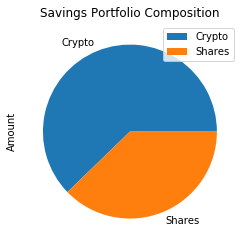

In [23]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Savings Portfolio Composition")

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving_value = total_cryptos_values + total_shares_values

# Validate saving health
if total_saving_value > emergency_fund:
    print(f"Congratulations!! you have ${total_saving_value} ,that is enough money")
elif total_saving_value == emergency_fund:
    print(f"Congratulation!! you are balance ${total_saving_value} '=' ${emergency_fund}")
else:
    print(f"You need to save more. you need ${(total_saving_value - emergency_fund)} to reach your goal!")

Congratulations!! you have $115863.89 ,that is enough money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-04-21', tz='America/New_York').isoformat() # only could run from 2017
end_date = pd.Timestamp('2021-04-21', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date, # only ran from 2017
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.tail()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-04-15 00:00:00-04:00  113.78  114.980  113.78  114.81  5455777  413.74   
2021-04-16 00:00:00-04:00  114.56  114.665  114.50  114.54  3488514  417.25   
2021-04-19 00:00:00-04:00  114.00  114.500  114.00  114.44  4820664  416.26   
2021-04-20 00:00:00-04:00  114.42  114.670  114.39  114.62  3674209  413.91   
2021-04-21 00:00:00-04:00  114.60  114.740  114.53  114.74  5250384  411.51   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-15 00:00:00-04:00  416.1600  413.69  415.82  54836749  
2021-04-16 00:00:00-04:00  417.9100  415.73  417.31  66624780  
2021-04-19 00:00:00-04:00  416.7400  413.79  415.24  66226327  
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050  
2021-04-21 00:00:00-04:00  416.2900  411.36  416.08  54772634

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AGG_SPY = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [.40,.60],
    num_trading_days = 252 * 30 # this the correct way t0 get 30 yrs but API (alpaca_trade_api) prevent that from happening
)

In [35]:
# Printing the simulation input data
MC_AGG_SPY.portfolio_data.head()

AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2017-05-02 00:00:00-04:00  108.68  108.94  108.679  108.890  2570794   
2017-05-03 00:00:00-04:00  108.97  108.99  108.770  108.795  1765578   
2017-05-04 00:00:00-04:00  108.55  108.70  108.550  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.570  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.490  108.495  1579134   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-02 00:00:00-04:00          NaN  238.84  238.9800  238.30  238.79   
2017-05-03 00:00:00-04:00    -0.000872  238.32  238.8775  237.70  238.52   
2017-05-04 00:00:00-04:00    -0.001195  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   

                                                  
                             volume daily_return  
time                                              
2017-05-02 00:00:00-04:00  39563850          NaN  
2017-05-03 00:00:00-04:00  47292627    -0.001131  
2017-05-04 00:00:00-04:00  46170233     0.000964  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002958,0.987039,0.997560,0.984499,1.004199,1.005540,0.997362,0.995771,1.007000,1.005696,...,1.009208,0.987805,0.994943,0.991911,0.992998,1.004562,1.011236,1.001166,0.999153,0.983874
2,1.002397,0.992941,1.009610,0.972774,1.001600,1.005636,1.005515,0.986883,1.009372,0.998620,...,1.022434,0.997288,0.992700,1.000439,1.008594,1.008134,1.014819,0.997525,1.004993,0.973968
3,1.006321,0.979712,1.004134,0.957051,1.000250,1.002401,1.004127,0.989337,1.015785,0.998987,...,1.030941,1.000165,0.997918,0.998722,1.018913,0.992520,1.032749,0.987761,0.999054,0.981409
4,1.007995,0.973500,1.016976,0.963915,0.998149,1.010842,1.014867,1.000855,1.028289,0.999568,...,1.048516,1.008948,1.008673,1.013013,1.029739,0.997182,1.028650,0.989783,1.000692,0.980278
5,1.002236,0.971667,1.018012,0.973711,0.995020,1.011768,1.006118,0.989484,1.022219,0.984841,...,1.048821,1.009505,1.013180,1.008249,1.041578,1.004549,1.014015,0.994288,1.001686,0.987563
6,0.994031,0.979435,1.023925,0.979351,0.995255,1.017985,0.988482,0.996233,1.026879,0.986521,...,1.049453,1.006314,1.011050,1.012083,1.054253,1.009923,1.004831,0.986450,1.012035,0.995283
7,1.003159,0.979090,1.027620,0.979750,0.997634,1.017172,0.967980,1.007839,1.019436,0.990172,...,1.027623,0.999587,1.022064,1.019254,1.056022,1.007695,1.003301,0.991571,1.006747,0.987174
8,1.017270,0.992319,1.026427,0.981195,1.001055,1.017375,0.955563,1.011670,1.015806,0.986275,...,1.036178,1.003768,1.017118,1.025050,1.062377,1.002194,1.009756,0.979093,0.989864,0.988814
9,1.024706,0.991287,1.028151,0.967536,0.992247,1.014611,0.947272,0.982793,1.021619,0.991833,...,1.017637,1.009635,1.015447,1.022018,1.068055,0.997770,1.022378,0.978400,0.992876,0.994495


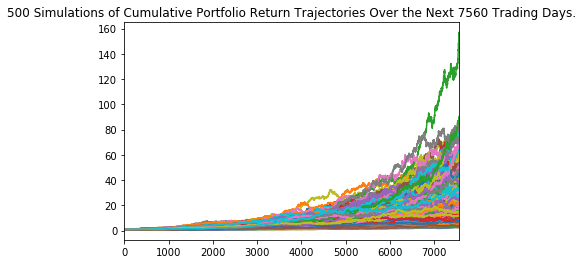

In [38]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()

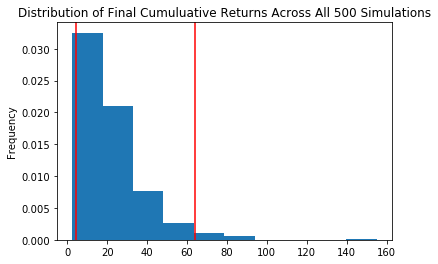

In [39]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_AGG_SPY.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_AGG_SPY = MC_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(summary_AGG_SPY) #Note this isnt 30yr 

count           500.000000
mean             22.030002
std              16.294248
min               2.447474
25%              10.960009
50%              17.837716
75%              27.704059
max             154.999104
95% CI Lower      4.320274
95% CI Upper     63.813846
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_AGG_SPY[8]*initial_investment,2)
ci_upper = round(summary_AGG_SPY[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 3 years will end within in the range of $86405.48 and $1276276.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_AGG_SPY[8]*initial_investment,2)
ci_upper = round(summary_AGG_SPY[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129608.22 and $1914415.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")